# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Datasets
df_train=pd.read_csv("Training Dataset.csv")
df_test=pd.read_csv("Test Dataset.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Data Exploration

In [5]:
#checking dataset size
print("Size of training data:",df_train.shape)
print("Size of testing data:",df_test.shape)

Size of training data: (614, 13)
Size of testing data: (367, 12)


In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#checking unique values per column
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
#checking null values for training data
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#checking null values for testing data
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
#checking duplicated values
print("No of duplicated values in training set:",df_train.duplicated().sum())
print("No of duplicated values in testing set:",df_test.duplicated().sum())

No of duplicated values in training set: 0
No of duplicated values in testing set: 0


In [11]:
test_ids = df_test['Loan_ID']

## Data Cleaning

In [12]:
#droping irrelevant columns
df_train.drop(columns=['Loan_ID'],axis=1,inplace=True)
df_test.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [13]:
# Numerical columns: filling with mean values fot training data
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
df_train[numerical_cols] = df_train[numerical_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

# Categorical columns: filling with mode values for training data
categorical_cols = df_train.select_dtypes(include=['object']).columns
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

In [14]:
# Filling missing values fot the testing data 
numerical_cols = df_test.select_dtypes(include=['float64', 'int64']).columns
df_test[numerical_cols] = df_test[numerical_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

categorical_cols = df_test.select_dtypes(include=['object']).columns
df_test[categorical_cols] = df_test[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

## Exploratory Data Analysis (EDA)

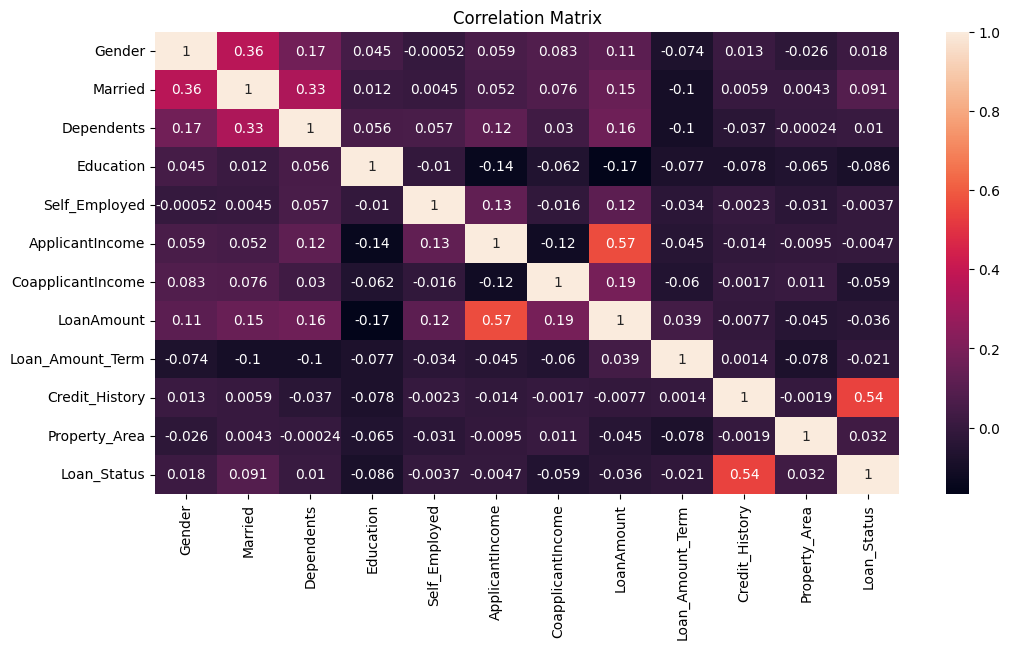

In [30]:
#Visualization using Correlation matrix
plt.figure(figsize=(12,6))
dataplot = sns.heatmap(df_train.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

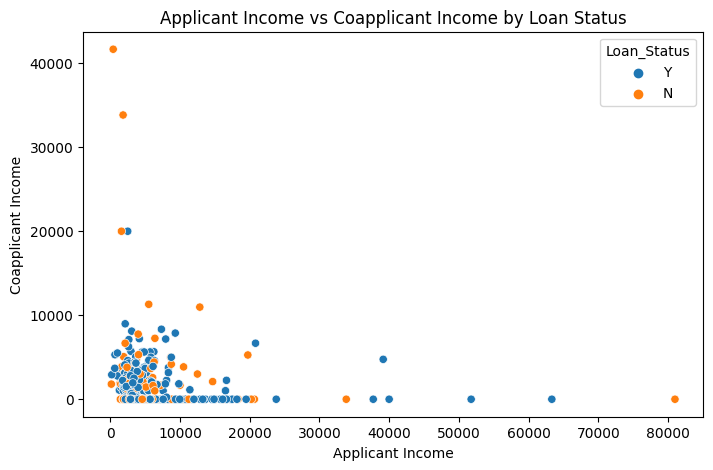

In [16]:
# Scatterplot for Applicant Income and Coapplicant Income based on Loan Status
plt.figure(figsize=(8, 5))
scatter_plot = sns.scatterplot(data=df_train, x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status')

scatter_plot.set_title('Applicant Income vs Coapplicant Income by Loan Status')
scatter_plot.set_xlabel('Applicant Income')
scatter_plot.set_ylabel('Coapplicant Income')

plt.show()

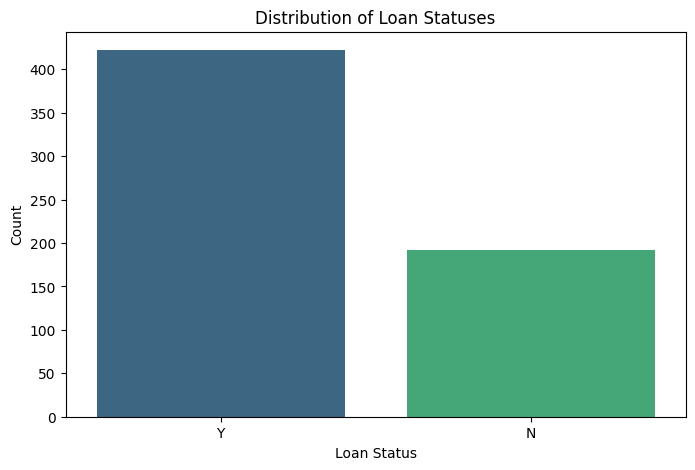

In [18]:
#visualizing the value counts of loan status
plt.figure(figsize=(8,5))
sns.countplot(x='Loan_Status', data=df_train, palette='viridis')
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [19]:
#Converting columns containing objects into numeric data type
from sklearn.preprocessing import LabelEncoder

def encode_object_columns(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include='object').columns:
        df[col] = le.fit_transform(df[col]) 
    return df

df_train = encode_object_columns(df_train)
df_test = encode_object_columns(df_test)

In [20]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## Splitting into Training & Testing Sets

In [21]:
#Separating the features and the target variable
X=df_train.drop(columns=['Loan_Status'])
y=df_train['Loan_Status']

In [22]:
#breaking the dataset into 80% training data and 20% testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Classical Machine Learning Algorithms

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Defining the the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Evaluating model performances
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Performance of {name} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


Performance of Logistic Regression - Accuracy: 0.789, Precision: 0.825, Recall: 0.789, F1 Score: 0.761
Performance of Support Vector Machine - Accuracy: 0.650, Precision: 0.773, Recall: 0.650, F1 Score: 0.513
Performance of K-Nearest Neighbors - Accuracy: 0.585, Precision: 0.501, Recall: 0.585, F1 Score: 0.520
Performance of Naive Bayes - Accuracy: 0.789, Precision: 0.814, Recall: 0.789, F1 Score: 0.765
Performance of Decision Tree - Accuracy: 0.715, Precision: 0.709, Recall: 0.715, F1 Score: 0.711


## Ensemble Machine Learning Algorithms

In [24]:
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier

# Defining the base classifiers
base_classifiers = [
    ('logistic', LogisticRegression(max_iter=10000)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC()),
    ('nb', GaussianNB()),
    ('tree', DecisionTreeClassifier(random_state=42))
]

# classifiers
classifiers = {
    'Bagging Classifier': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    'Stacking Classifier': StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=10000)),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Evaluating model performances
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Performance of {name} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

Performance of Bagging Classifier - Accuracy: 0.756, Precision: 0.757, Recall: 0.756, F1 Score: 0.736
Performance of Stacking Classifier - Accuracy: 0.789, Precision: 0.825, Recall: 0.789, F1 Score: 0.761
Performance of Random Forest - Accuracy: 0.772, Precision: 0.791, Recall: 0.772, F1 Score: 0.747
Performance of Gradient Boosting - Accuracy: 0.748, Precision: 0.745, Recall: 0.748, F1 Score: 0.729


## Selected Model Performance

In [25]:
#Selected model: Naive bayes with accuracy of 78.9%
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [26]:
#Checking accuracy,classification report and confusion matrix of selected model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

Accuracy: 0.789


,precision,recall,f1-score,support
0,0.904762,0.441860,0.593750,43.000000
1,0.764706,0.975000,0.857143,80.000000
accuracy,0.788618,0.788618,0.788618,0.788618
macro avg,0.834734,0.708430,0.725446,123.000000
weighted avg,0.813669,0.788618,0.765062,123.000000


In [27]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[19, 24],
       [ 2, 78]], dtype=int64)

## Predicting Loan Approval

In [28]:
predictions = nb.predict(df_test)

In [29]:
predictions = ['Y' if pred == 1 else 'N' for pred in predictions]
output = pd.DataFrame({'Loan_ID': test_ids, 'Loan_Status': predictions})

# Saving the output in form of CSV file
output.to_csv('predicted_approval.csv', index=False)
output.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
